# Homework: Significance Test

<img src="https://i.dlpng.com/static/png/5251081-redpill-red-pill-png-384_269_preview.png" width="200" align="right">

## Objectives

- Practice working with Jupyter Notebooks
- Understand the basic concepts of statistical significance
- Use the _shuffling_ method for hypothesis testing

Recommended source: https://www.youtube.com/watch?v=Iq9DzN6mvYA

## Background

Your professor is conducting a [randomized control trial](https://en.wikipedia.org/wiki/Randomized_controlled_trial) to verify the effectiveness of a new wonder supplement ( _Pythonifin_ ) on algorithmic thinking and problem solving. The instructor first seeks [IRB](https://en.wikipedia.org/wiki/Institutional_review_board) approval and he follows the ethical guidelines for human subject research by making the participation completely voluntary, offering no rewards (or punishment) for taking (or not taking) part in the study, and assigning the participants to the treatment (i.e. taking _Pythonifin_ ) and to the control (i.e. taking a placebo) groups completely randomly.

By the beginning of the trial 35 students decide to enroll to the study. Since there are 20 doses of _Pythonifin_ are availaable, the professor decides to assing 20 students to the treatment group and the remaining 15 students to the control group. Each test subject is given a pill 30 minutes before taking a test exam (this exam score will not be used in the final semester grade). All tests are evaluated without knowing the group assignments (blind study). The anonymized test scores are shown in the following table:

| Pythofinin | Placebo |
|------------|---------|
|          91|       84|
|          87|       92|
|          71|       78|
|         100|      100|
|          91|       82|
|          97|       85|
|         100|       78|
|          80|       87|
|         100|      100|
|          79|       85|
|          83|       93|
|          94|       76|
|          83|       86|
|          79|       89|
|          99|       88|
|          95|         |
|          90|         |
|          97|         |
|         100|         |
|          91|         |

While, at first glance, the results show a slight advantage in using _Pythonifin_ , the professor has heard about rigorous significance testing. Unfortunately, he has very limited background in statistical techniques. He decides to do a [permutation test](https://en.wikipedia.org/wiki/Resampling_(statistics)#Permutation_tests) to see if the results are significant at a _p value_ of 5%. In a nutshell, he wants to know, that the chance of getting this particular result by accident is less than 5%.

In this assignment you are going to follow the thought process of your professor. **Try to understand each step, and make sure you provide code solutions and/or text inputs for each `#TODO` item (replacing `#TODO` with your input).**

## Step 1: Setup (10 pts)
Please, provide your VUnetID. Also, if you need to import any additional Python modules (you can come back here later), add those import statements in the following code cell.

**VUnetID** : senths1

In [1]:
# Import statements
import random
import numpy as np
import matplotlib.pyplot as plt
import statistics

## Step 2: Data Preparation (10 pts)

Using the results table above, create two Python lists, named `pythonifin` and `placebo`, containing the test scores for each subject.

In [2]:
pythonifin = [91, 87, 71, 100, 91, 97, 100, 80, 100, 79, 83, 94, 83, 79, 99, 95, 90, 97, 100, 91]
placebo = [84, 92, 78, 100, 82, 85, 78, 87, 100, 85, 93, 76, 86, 89, 88]

## Step 3: Initial Observations (15 pts)

Compute the average (mean) scores for both groups. Print these values and the difference between them (the actual formating is up to you).

In [3]:
mean_pythonifin = sum(pythonifin)/len(pythonifin)
mean_placebo = sum(placebo)/len(placebo)
diff = mean_pythonifin - mean_placebo

print(mean_pythonifin)
print(mean_placebo)
print(diff)

90.35
86.86666666666666
3.4833333333333343


## Step 4: Initial Conclusion

Please, provide your initial assesment in plain english on the effectiveness of _Pythofinin_. Please, be honest and do not come back later to re-assess you conclusions here. _This answer will not be graded_ .


**Your initial assessment**: Pythofinin looks like it is effective since the average test score for people who took this wonder drug before the exam is higher than the average test core for people who didn't take the drug


## Step 5: Getting some insights (15 pts)

Use the [`plt.hist()`](https://matplotlib.org/3.3.1/api/_as_gen/matplotlib.pyplot.hist.html) function to plot the histograms of the two groups. You should have a single figure with two overlapping histogram plots in different colors. (Hint: you may want to use the `alpha=` optional parameter to control the transparency.)

(array([3., 0., 1., 3., 2., 2., 1., 1., 0., 2.]),
 array([ 76. ,  78.4,  80.8,  83.2,  85.6,  88. ,  90.4,  92.8,  95.2,
         97.6, 100. ]),
 <BarContainer object of 10 artists>)

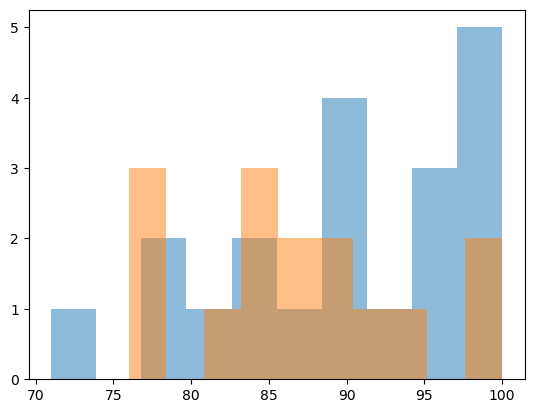

In [4]:
plt.hist(pythonifin, bins=10, alpha=0.5, label='pythonifin')
plt.hist(placebo, bins=10, alpha=0.5, label='placebo')

## Step 5: Intermediate Conclusion

Based on the histograms do you have a _second opinion_ (in plain english) on the results? Again, do this now, and do not come back later. _This answer will not be graded_ .


**Your intermediate assessment**: No, I do not have a second opinion - everything here looks correct - I still believe that Pythofinin provides students with better problem-solving skills as seen by the blue bar, which has a higher average than the placebo (orange bar)


## Step 6: Significance Test with Permutation (40 pts)

Use the permutation (a.k.a shuffling) approach to test the significance of your results. 

- Run `1000` experiments where you _randomly_ (re)assign all the test scores to the two treatment groups. Make sure, you keep the group sizes the same (20 vs. 15). 
- Store the difference of the means of the two random groups in a Python list (`1000` difference of means from the `1000` experiments).
- Compute the number of experiments, when the difference between the two group mean scores were _at least_ as high as in the original non-shuffled case (i.e. Step 3) and compute the ratio of this count to the total number of experiments (this is your estimated _p-value_ ).
- Make a histogram plot of the difference of means.
- Print your _p-value_ (actual formating is up to you). Note: the _p-value_ is the area of the tail section of your histogram beyond the x-axis coordinate of the original difference of means.

p-value: 0.101
The difference in means between groups are not statistically significant; People that use pythonifin do not score statisticaly significantly better than people without it


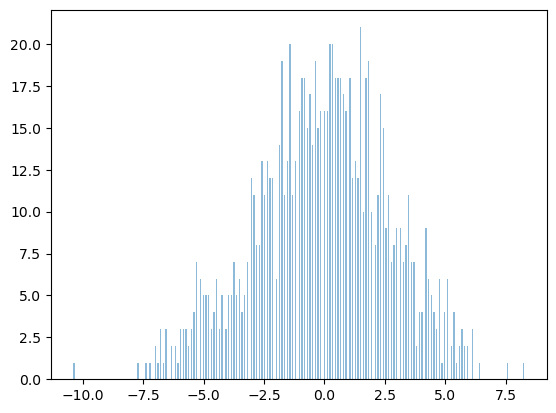

In [6]:
n_permut = 1000
diff_n = []

# randomly shuffles and re-assigns all the test scores
# calculates the difference between the two groups
for n in range(n_permut):
    to_shuffle = pythonifin + placebo
    random.shuffle(to_shuffle)
    
    pythonifin = to_shuffle[0:len(pythonifin)]
    placebo = to_shuffle[len(pythonifin):35]
    
    mean_pythonifin = sum(pythonifin)/len(pythonifin)
    mean_placebo = sum(placebo)/len(placebo)
    
    diff_n.append(mean_pythonifin - mean_placebo)
    
# counts the number of experiments where the difference between the two group mean 
# scores were at least as high as in the original
count = 0
for x in diff_n:
    if x >= diff:
        count += 1

# to calculate the right number of bins2 - using David Scott's method
R = len(diff_n)
n =35
y = statistics.stdev(diff_n)
bins2 = R * (n ** (1/3))/(3.49 * y)

# plots the histogtam
plt.hist(diff_n, bins= int(bins2), alpha=0.5, label='diff_in_means')

# calculates the p-value
p_value = count / len(diff_n)
print ("p-value: " + str(p_value))

# the alpha value
alpha_value = 0.05

# says if it is statistically significant or not based on the alpha_value
if p_value < alpha_value:
    print ("The difference in means between group are statistically significant; People that use pythonifin score statistically significantly better than people without it")
else:
    print ("The difference in means between groups are not statistically significant; People that use pythonifin do not score statisticaly significantly better than people without it")

## Step 7: Final Conclusion (10 pts)

Please, provide your **final assesment** in plain english on the effectiveness of _Pythofinin_. You should reject the hypothesis that the supplement works if your test result (difference of the two origianlly observed means) can happen accidentally by more than 5% chance. (Note: 5% is an arbitrary but widely accepted threshold).


**Your final assessment**: Based on rigorous permutation testing, students that use pythofinin do NOT score statistically significantly better than students who do not use pythofinin.

## Grading

In this assignment you will not have access to an autograder program (i.e. _validator_ ). Your work will be inspected and graded manually. Make sure you took care of every `#TODO` items in your assignment. Also, verify, that your notebook document can be executed sequentially from a clean state. You can do this by using the _"Kernel/Restart & Run All"_ menu item and checking your results.

### Penalties

Your work will not be checked for PEP8 style problems. Still, try to write readable and concise code.

## Submission

Please, upload the final version of this notebook file (`significance.ipynb`) to Brightspace.